In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('deep')
sns.set_color_codes('deep')

In [5]:
## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/VogelData/'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [7]:
df = pd.read_csv('vogeldata.csv')

In [8]:
df.head(20)

,Age,id,conditionno,TrialTypefMRI,CorrectResponse,response,PAE,rt
0,25,1,1,1,-99999,2.000000,,1200
1,25,1,3,1,-99999,2.000000,,1018
2,25,1,2,1,-99999,2.000000,,962
3,25,1,1,1,-99999,2.000000,,907
4,25,1,2,1,-99999,2.000000,,816
5,25,1,3,1,-99999,2.000000,,914
6,25,1,1,1,-99999,2.000000,,768
7,25,1,2,1,-99999,2.000000,,779
8,25,1,1,1,-99999,2.000000,,850
9,25,1,3,1,-99999,2.000000,,1052


In [9]:
len(df)

2688

In [10]:
new_df = df.loc[df.CorrectResponse != -99999,:]
rem_prac = len(new_df)

In [11]:
new_df = new_df.rename(columns = {'id':'s_id'})
new_df.columns

Index([u'Age', u's_id', u'conditionno', u'TrialTypefMRI', u'CorrectResponse',
       u'response', u'PAE', u'rt'],
      dtype='object')

In [12]:
nsub = len(new_df.s_id.unique())

In [13]:
(len(df)-len(new_df))/14

12

In [14]:
new_df['Missed'] = 0

In [15]:
new_df.loc[new_df['response'] == -99999, 'Missed'] =1
new_df.head(30)

,Age,s_id,conditionno,TrialTypefMRI,CorrectResponse,response,PAE,rt,Missed
12,25,1,1,2,3,1.811125,1.188874515,3726,0
13,25,1,1,2,3,2.069858,0.930142303,2994,0
14,25,1,1,2,3,2.457956,0.542043984,3715,0
15,25,1,1,2,7,11.384217,4.384217335,3270,0
16,25,1,1,2,7,9.573092,2.57309185,4840,0
17,25,1,1,2,7,8.020699,1.020698577,4358,0
18,25,1,1,2,11,9.831824,1.168175938,3410,0
19,25,1,1,2,11,11.125485,0.125485123,2549,0
20,25,1,1,2,11,11.642950,0.642949547,4069,0
21,25,1,1,2,13,15.265201,2.265200517,2529,0


In [16]:
new_df.Missed.sum()/nsub

8

In [17]:
new_df.loc[new_df['response'] == -99999, ['response', 'PAE', 'rt']] = np.nan
new_df.head(30)

,Age,s_id,conditionno,TrialTypefMRI,CorrectResponse,response,PAE,rt,Missed
12,25,1,1,2,3,1.811125,1.188874515,3726,0
13,25,1,1,2,3,2.069858,0.930142303,2994,0
14,25,1,1,2,3,2.457956,0.542043984,3715,0
15,25,1,1,2,7,11.384217,4.384217335,3270,0
16,25,1,1,2,7,9.573092,2.57309185,4840,0
17,25,1,1,2,7,8.020699,1.020698577,4358,0
18,25,1,1,2,11,9.831824,1.168175938,3410,0
19,25,1,1,2,11,11.125485,0.125485123,2549,0
20,25,1,1,2,11,11.642950,0.642949547,4069,0
21,25,1,1,2,13,15.265201,2.265200517,2529,0


In [18]:
new_df['error'] = new_df.response - new_df.CorrectResponse
new_df.head(30)

,Age,s_id,conditionno,TrialTypefMRI,CorrectResponse,response,PAE,rt,Missed,error
12,25,1,1,2,3,1.811125,1.188874515,3726,0,-1.188875
13,25,1,1,2,3,2.069858,0.930142303,2994,0,-0.930142
14,25,1,1,2,3,2.457956,0.542043984,3715,0,-0.542044
15,25,1,1,2,7,11.384217,4.384217335,3270,0,4.384217
16,25,1,1,2,7,9.573092,2.57309185,4840,0,2.573092
17,25,1,1,2,7,8.020699,1.020698577,4358,0,1.020699
18,25,1,1,2,11,9.831824,1.168175938,3410,0,-1.168176
19,25,1,1,2,11,11.125485,0.125485123,2549,0,0.125485
20,25,1,1,2,11,11.642950,0.642949547,4069,0,0.642950
21,25,1,1,2,13,15.265201,2.265200517,2529,0,2.265201


# How many missed by subj?

In [19]:
new_df.loc[:,'conditionno'] = new_df['conditionno'].replace([1,2,3],['1_Number', '2_Luminance', '3_Word'])

In [20]:
new_df[['s_id', 'Missed']].groupby('s_id').sum()

,Missed
s_id,
1,10
2,11
3,17
5,5
6,6
7,3
8,10
10,12
11,9


In [21]:
new_df[['s_id', 'conditionno', 'Missed']].groupby(['s_id', 'conditionno']).sum()

Missed
s_id conditionno        
1    1_Number          3
     2_Luminance       3
     3_Word            4
2    1_Number          4
     2_Luminance       2
     3_Word            5
3    1_Number          2
     2_Luminance       4
     3_Word           11
5    1_Number          3
     2_Luminance       1
     3_Word            1
6    1_Number          1
     2_Luminance       2
     3_Word            3
7    1_Number          0
     2_Luminance       2
     3_Word            1
8    1_Number          5
     2_Luminance       1
     3_Word            4
10   1_Number          4
     2_Luminance       2
     3_Word            6
11   1_Number          7
     2_Luminance       0
     3_Word            2
12   1_Number          1
     2_Luminance       1
     3_Word            0
13   1_Number          2
     2_Luminance       2
     3_Word            1
16   1_Number          6
     2_Luminance       4
     3_Word            3
17   1_Number          0
     2_Luminance       1
     3_Word            1
18   1_Number          3
     2_Luminance       4
     3_Word            1

In [22]:
new_df[['conditionno', 'CorrectResponse', 'Missed']].groupby(['conditionno', 'CorrectResponse']).sum()

Missed
conditionno CorrectResponse        
1_Number    3                     0
            7                     2
            11                    3
            13                    1
            21                    1
            28                    0
            33                   11
            36                    2
            42                    1
            45                    0
            56                    1
            57                    4
            60                    2
            65                    4
            74                    1
            77                    2
            83                    1
            85                    0
            90                    3
            98                    2
2_Luminance 3                     0
            7                     1
            11                    1
            13                    5
            21                    3
            28                    2
            33                    1
            36                    0
            42                    1
            45                    1
            56                    1
            57                    1
            60                    2
            65                    2
            74                    0
            77                    3
            83                    0
            85                    1
            90                    0
            98                    4
3_Word      3                     7
            7                     1
            11                    4
            13                    5
            21                    3
            28                    0
            33                    1
            36                    0
            42                    0
            45                    4
            56                    0
            57                    0
            60                    0
            65                    0
            74                    1
            77                    1
            83                    0
            85                    4
            90                    2
            98                   10

In [23]:
pal = sns.color_palette()

# Histograms

In [24]:
new_df.loc[new_df['rt']<1000, ['response', 'PAE', 'rt', 'error']] = np.nan

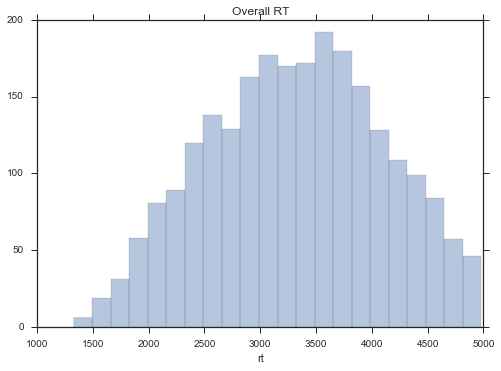

In [25]:
sns.distplot(new_df.rt.dropna(), kde= False, color=pal[0])
plt.title('Overall RT')

(500, 5000)

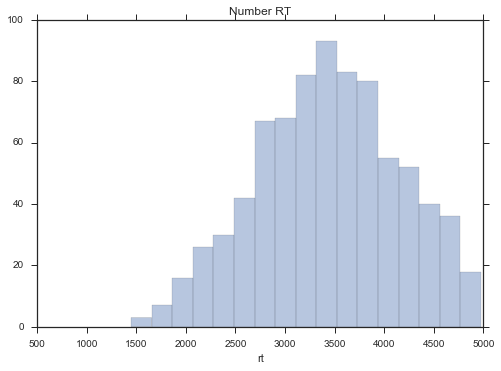

In [26]:
sns.distplot(new_df.loc[new_df['conditionno']=='1_Number','rt'].dropna(), kde=False, color=pal[0])
plt.title('Number RT')
plt.ylim([0,100])
plt.xlim([500,5000])

(500, 5000)

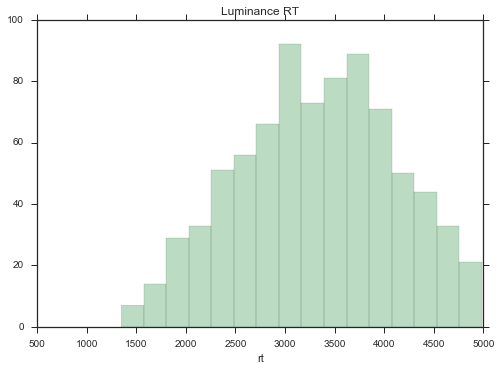

In [27]:
sns.distplot(new_df.loc[new_df['conditionno']=='2_Luminance','rt'].dropna(), kde=False, color=pal[1])
plt.title('Luminance RT')
plt.ylim([0,100])
plt.xlim([500,5000])

(500, 5000)

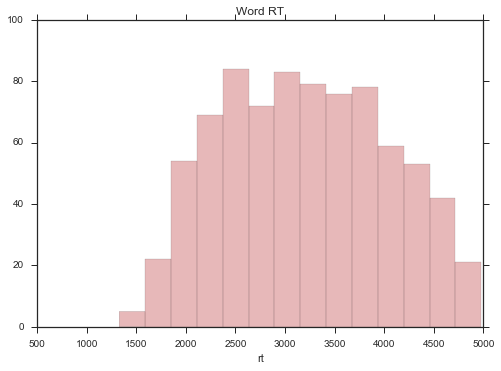

In [28]:
sns.distplot(new_df.loc[new_df['conditionno']=='3_Word','rt'].dropna(), kde=False, color=pal[2])
plt.title('Word RT')
plt.ylim([0,100])
plt.xlim([500,5000])

In [29]:
new_df.PAE = new_df.PAE.astype(float)

Age is inconsistent in their data, some subjects have different ages associated with different trials

In [30]:
new_df[['s_id','PAE', 'rt','error']].groupby('s_id').mean()

,PAE,rt,error
s_id,,,
1,8.431337,3089.811765,-7.666646
2,4.956398,3170.757396,-3.970139
3,11.403400,3407.644172,-10.929682
5,3.961560,2923.977143,0.149266
6,4.139819,3415.333333,-3.330791
7,5.923162,3233.338983,-5.185132
8,7.171859,3345.647059,-5.541116
10,3.493293,3566.875000,-2.215294
11,7.291399,3232.900585,-6.759213


In [31]:
new_df[['s_id', 'conditionno','PAE', 'rt','error']].groupby(['s_id', 'conditionno']).mean()

PAE           rt      error
s_id conditionno                                   
1    1_Number      2.145526  3318.649123  -0.539525
     2_Luminance  22.330315  3082.982456 -22.128231
     3_Word        0.682221  2863.839286  -0.201210
2    1_Number      3.431251  3306.892857  -2.563297
     2_Luminance  10.424477  2868.724138  -8.835638
     3_Word        0.742938  3350.654545  -0.271669
3    1_Number      1.934068  3527.879310  -0.781505
     2_Luminance  30.883201  3231.982143 -30.806413
     3_Word        0.349368  3466.081633  -0.225546
5    1_Number      3.048365  2872.736842  -1.955380
     2_Luminance   8.501831  2931.847458   2.449734
     3_Word        0.303528  2965.610169  -0.117899
6    1_Number      1.849738  3578.355932  -0.771526
     2_Luminance  10.043561  3431.155172  -9.084289
     3_Word        0.502939  3230.491228  -0.125417
7    1_Number      2.215050  3171.966667  -0.420354
     2_Luminance  15.486550  3343.551724 -15.344649
     3_Word        0.292828  3187.406780  -0.043349
8    1_Number      2.767588  3376.363636  -1.484888
     2_Luminance  17.719276  3274.220339 -14.315500
     3_Word        0.385026  3390.732143  -0.280470
10   1_Number      1.583718  3744.839286  -0.296341
     2_Luminance   8.235402  3593.603448  -5.934380
     3_Word        0.380217  3353.611111  -0.210747
11   1_Number      1.711514  3472.358491  -0.536235
     2_Luminance  19.110608  3171.016667 -18.781716
     3_Word        0.163492  3078.103448  -0.008654
12   1_Number      2.765606  3904.677966  -1.354770
     2_Luminance  12.079396  3954.220339 -11.157564
     3_Word        0.129711  3685.833333  -0.043036
13   1_Number      4.092675  3593.206897  -1.010327
     2_Luminance  17.713008  3312.862069 -17.179797
     3_Word        0.476528  3087.271186  -0.019975
16   1_Number      2.133439  3612.722222  -0.273490
     2_Luminance  25.957794  3888.660714 -25.939683
     3_Word        0.530129  3103.017544  -0.286421
17   1_Number      2.086127  3266.237288  -0.839652
     2_Luminance  19.206161  3057.120690 -18.585694
     3_Word        0.419804  3056.033898  -0.189488
18   1_Number      2.081546  3320.473684  -0.880257
     2_Luminance  24.598411  3326.125000 -24.598411
     3_Word        0.397483  3155.457627  -0.227904

In [32]:
new_df = new_df.sort_values(by='CorrectResponse')

## RT boxplots

In [33]:
plt_df = new_df.copy()
plt_df = plt_df.groupby(['conditionno','CorrectResponse','s_id']).mean()
plt_df.to_csv('plot_data_vogel.csv', sep='\t')
plt_df = pd.read_csv('plot_data_vogel.csv',sep='\t')

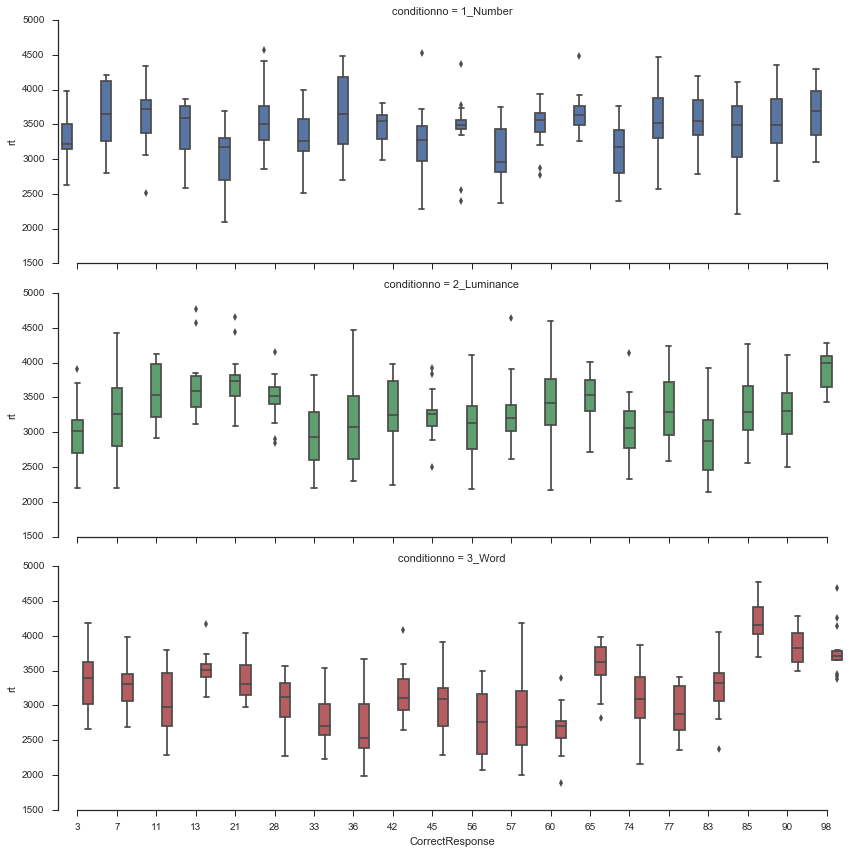

In [34]:
ax = sns.factorplot(x='CorrectResponse',y='rt',hue='conditionno',row='conditionno',data=plt_df,kind='box',size=4,aspect=3)
sns.despine(trim=True)

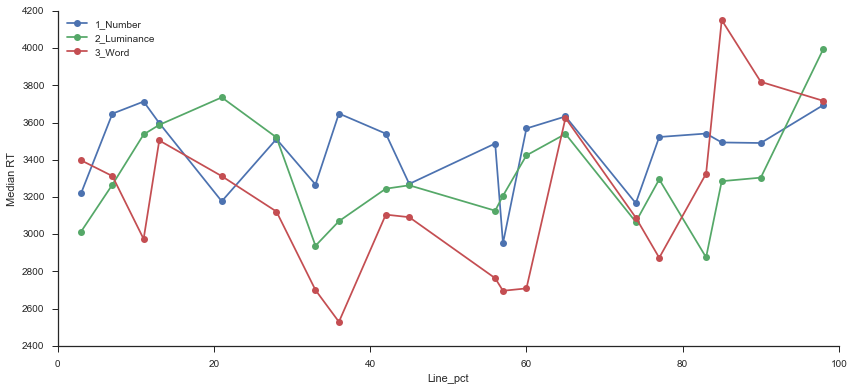

In [35]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('conditionno'):
    print
    plt.plot(grp.CorrectResponse.unique(),grp.groupby('CorrectResponse')['rt'].median(),'-o',label=key)
plt.legend(loc = 'best')
#plt.ylim([1.4,2.6])
plt.xlabel('Line_pct')
plt.ylabel('Median RT')
sns.despine(trim=True)

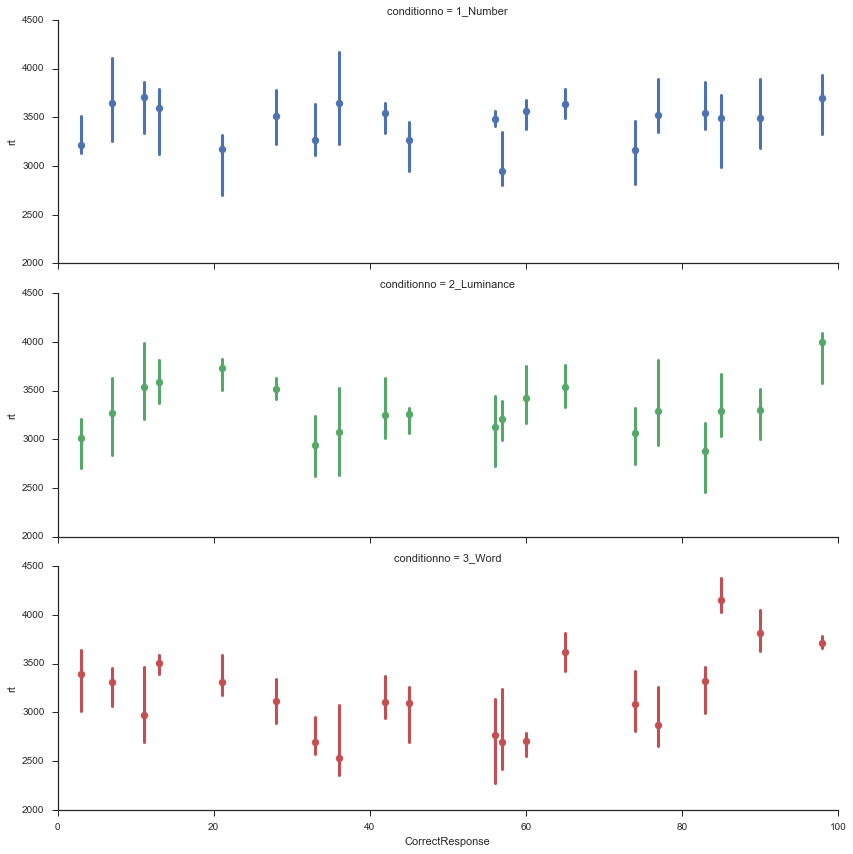

In [36]:
g = sns.FacetGrid(plt_df, row='conditionno',hue='conditionno',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'CorrectResponse', 'rt', fit_reg=False,x_estimator=np.median).set(xlim=(0,100))
sns.despine(trim=True)

# MAE boxplots

With means for each subject

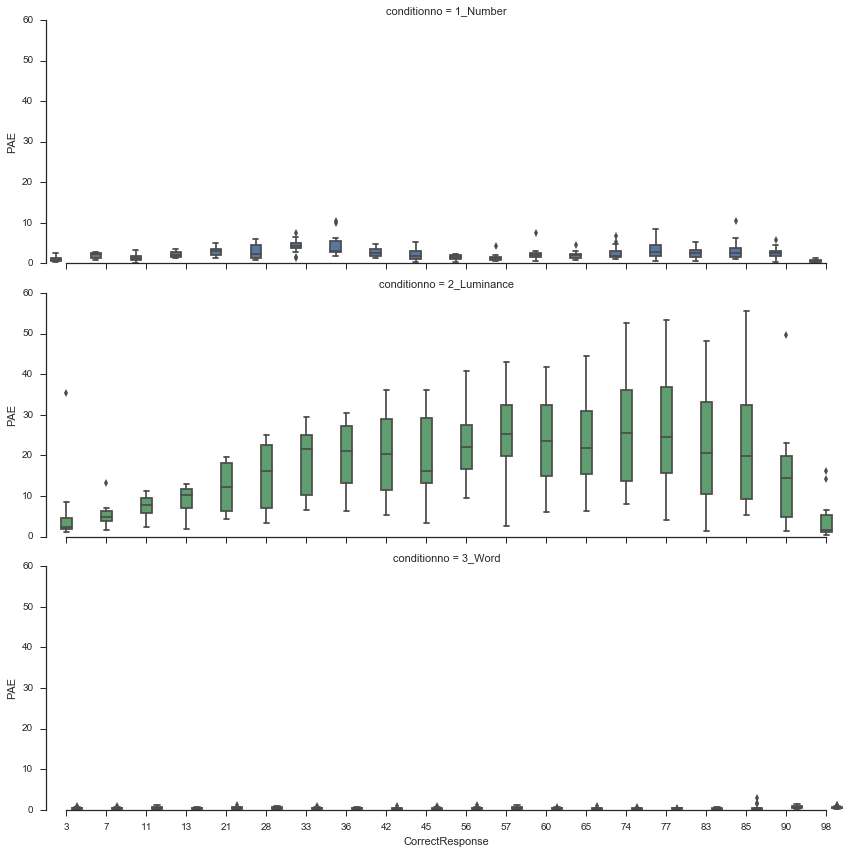

In [37]:
ax = sns.factorplot(x='CorrectResponse',y='PAE',hue='conditionno',row='conditionno',data=plt_df,kind='box',size=4,
                    aspect=3,sharey=True)
sns.despine(trim=True)

## Same plot as above but with different y axis to see pattern better

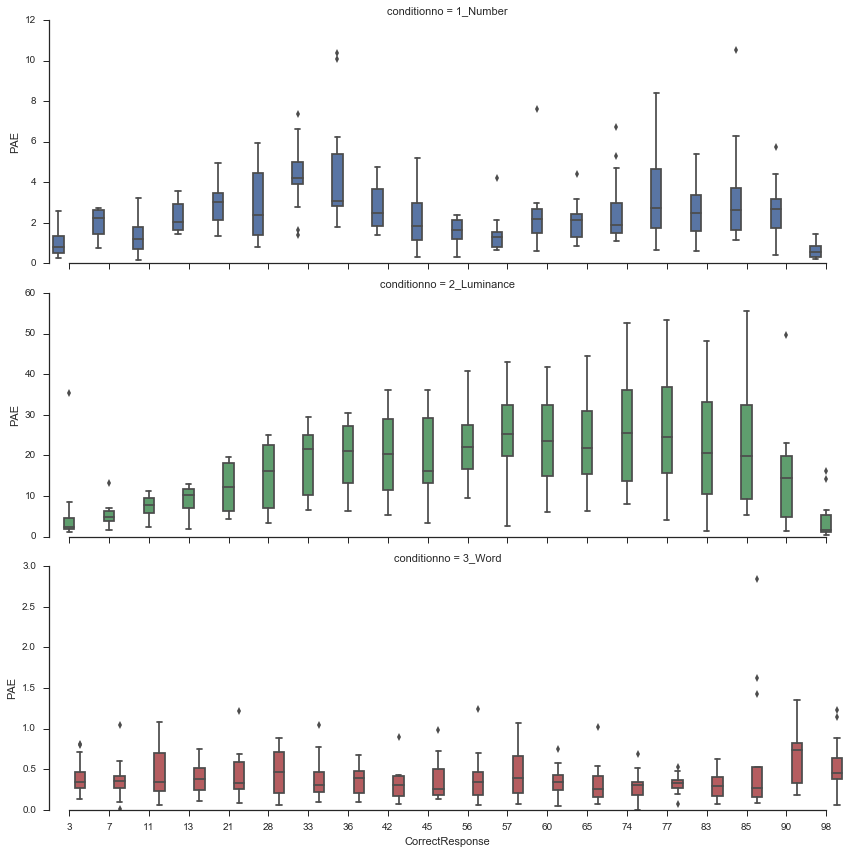

In [38]:
ax = sns.factorplot(x='CorrectResponse',y='PAE',hue='conditionno',row='conditionno',data=plt_df,kind='box',size=4,
                    aspect=3,sharey=False)
sns.despine(trim=True)

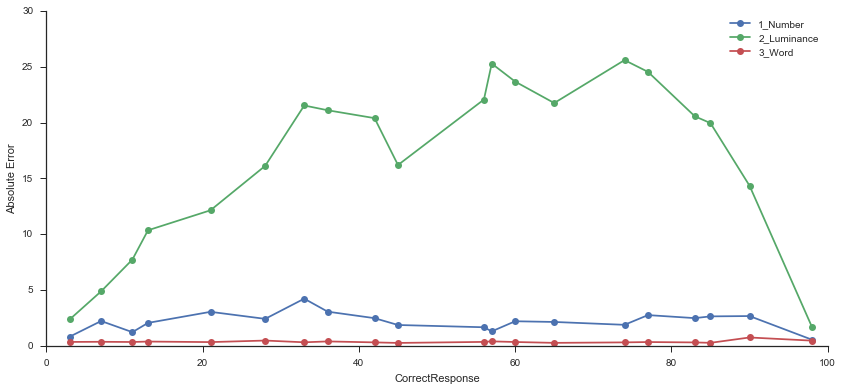

In [39]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('conditionno'):
    print 
    plt.plot(grp.CorrectResponse.unique(),grp.groupby('CorrectResponse')['PAE'].median(),'-o',label=key)
plt.legend(loc = 'best')
#plt.ylim([0,0.06])
plt.xlabel('CorrectResponse')
plt.ylabel('Absolute Error')
sns.despine(trim=True)

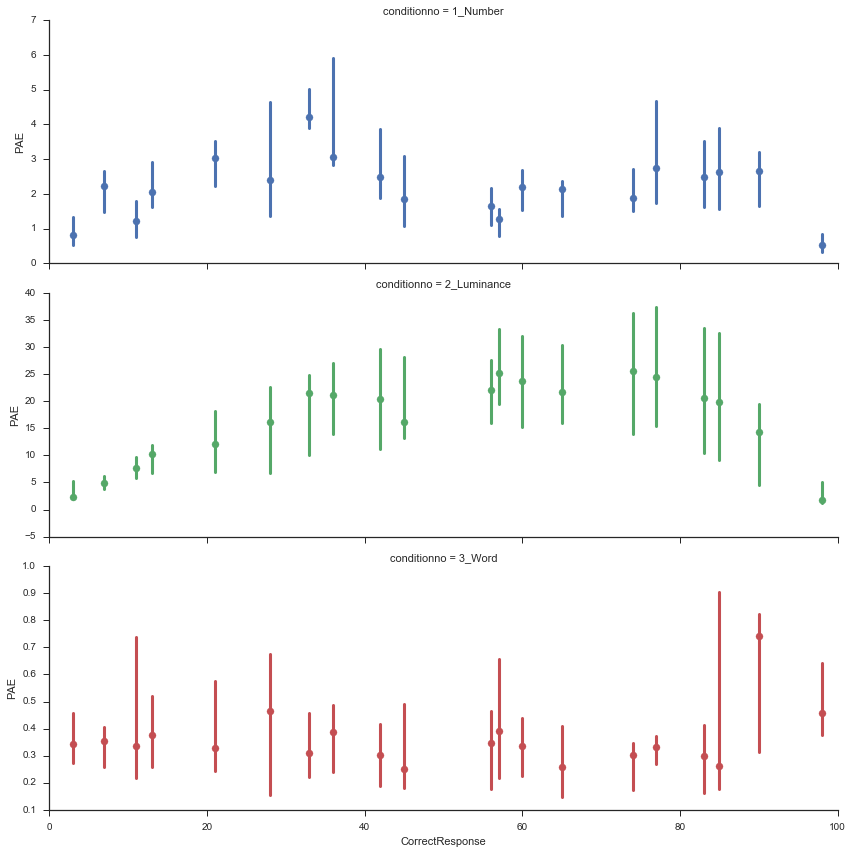

In [77]:
g = sns.FacetGrid(plt_df, row='conditionno',hue='conditionno',palette=pal,size=4,aspect=3, sharey=False)
g = g.map(sns.regplot, 'CorrectResponse', 'PAE', fit_reg=False,x_estimator=np.median,).set(xlim=(0,100))
sns.despine(trim=True)

## Signed Error

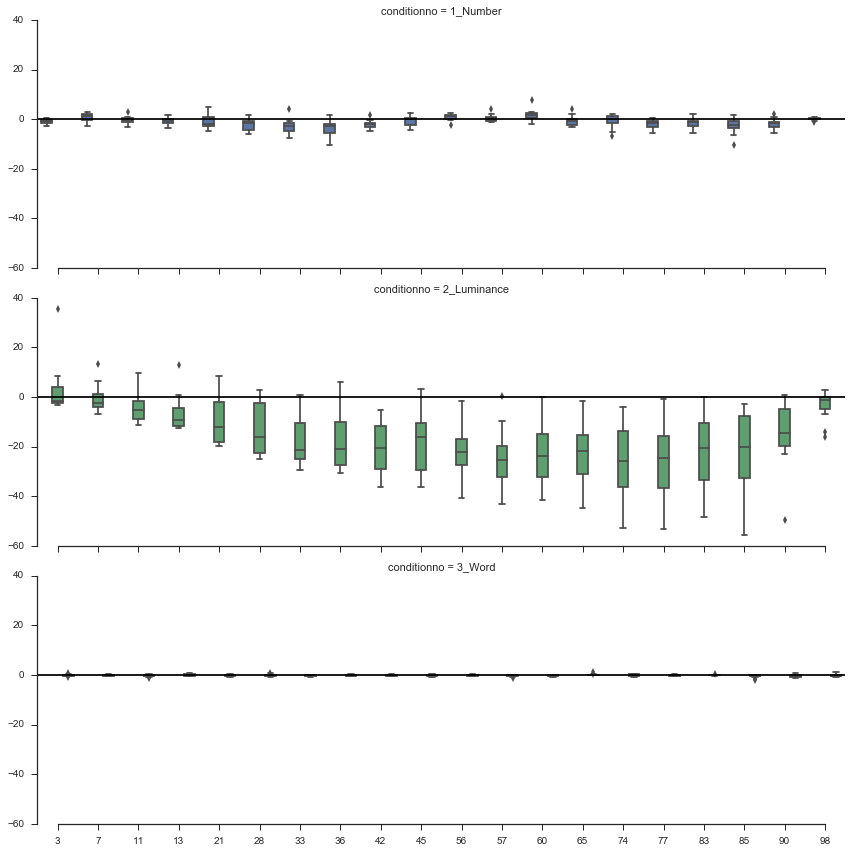

In [41]:
ax = sns.factorplot(x='CorrectResponse',y='error',hue='conditionno',row='conditionno',data=plt_df,kind='box',size=4,
                    aspect=3,sharey=True)
sns.despine(trim=True)
ax.map(plt.axhline, y=0, color='black')

## Same plot as above but with different y axis to see pattern 

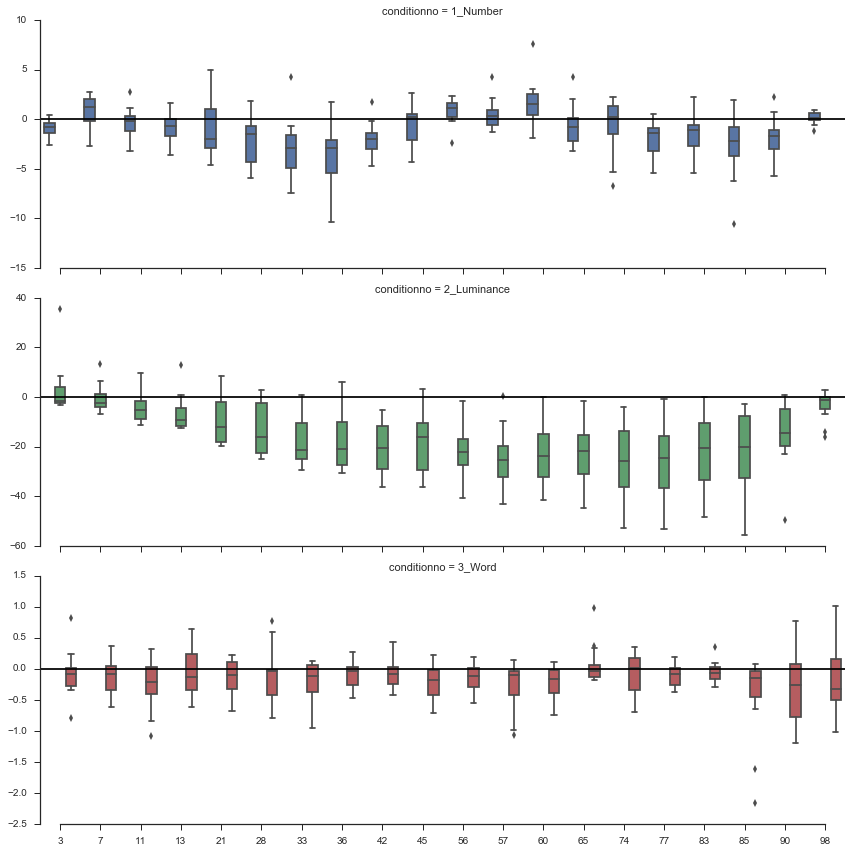

In [42]:
ax = sns.factorplot(x='CorrectResponse',y='error',hue='conditionno',row='conditionno',data=plt_df,kind='box',size=4,
                    aspect=3,sharey=False)
sns.despine(trim=True)
ax.map(plt.axhline, y=0, color='black')

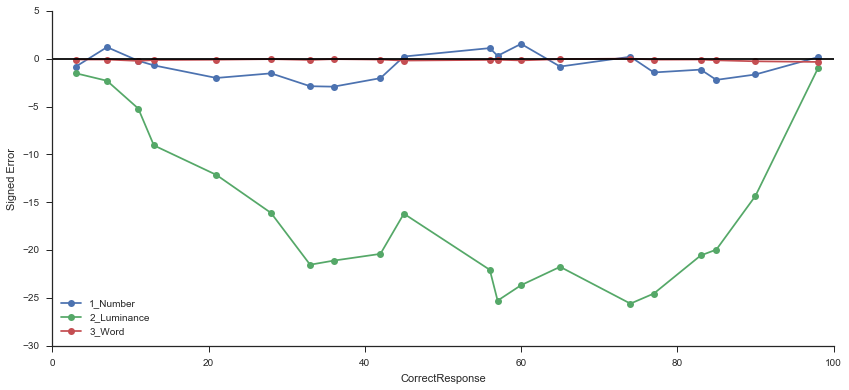

In [43]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('conditionno'):
    print 
    plt.plot(grp.CorrectResponse.unique(),grp.groupby('CorrectResponse')['error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
#plt.ylim([-.06,0.06])
plt.xlabel('CorrectResponse')
plt.ylabel('Signed Error')
sns.despine(trim=True)

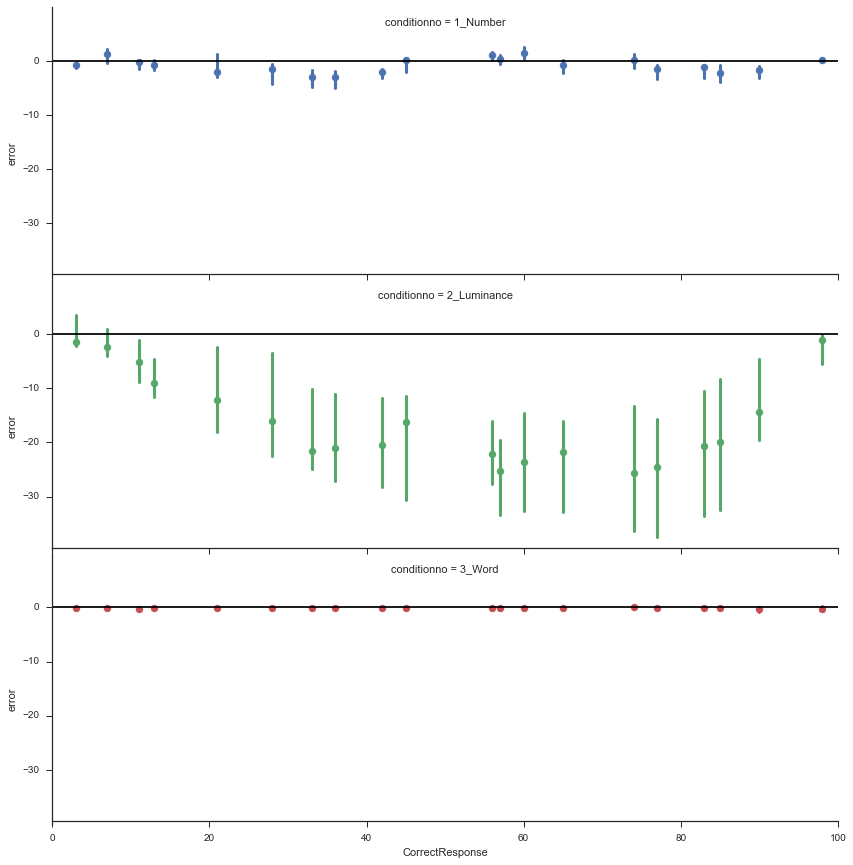

In [44]:
g = sns.FacetGrid(plt_df, row='conditionno',hue='conditionno',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'CorrectResponse', 'error', fit_reg=False,x_estimator=np.median).set(xlim=(0,100))
sns.despine(trim=True)
for ax in g.axes.flat:
    ax.plot((0,100),(0,0),c='black')

## SD Error boxplot

In [45]:
sd_df = new_df.copy()

In [46]:
sd_df = sd_df.groupby(['conditionno','CorrectResponse','s_id']).std()

In [47]:
sd_df.to_csv('plot_data_SD_Vogel.csv', sep='\t')
sd_df = pd.read_csv('plot_data_SD_Vogel.csv',sep='\t')

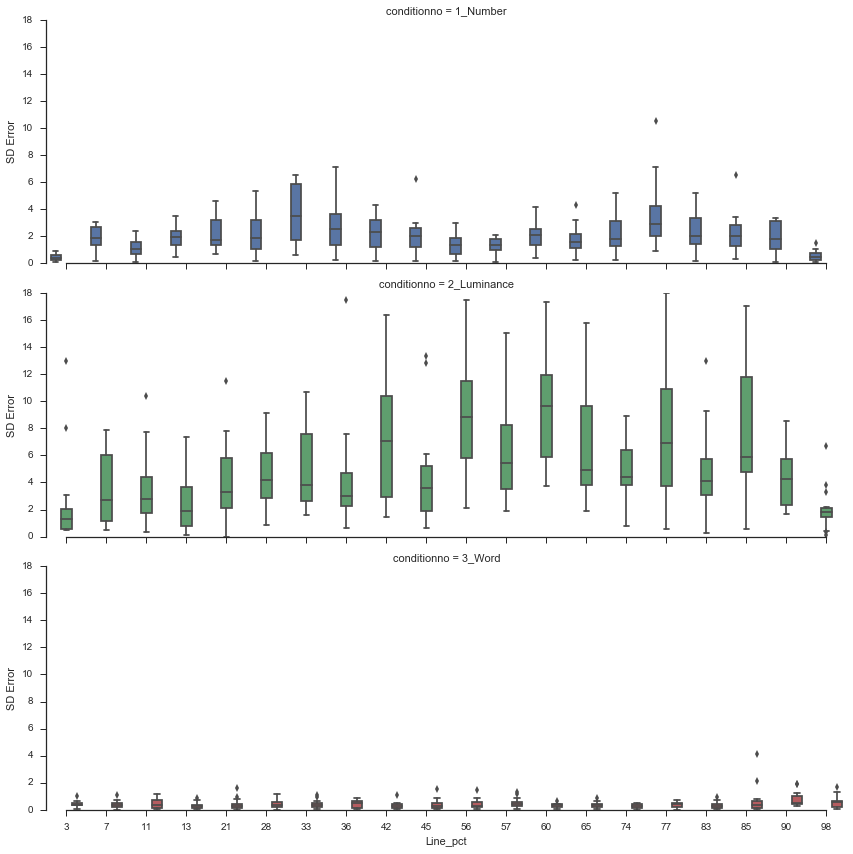

In [48]:
ax = sns.factorplot(x='CorrectResponse',y='error',hue='conditionno',row='conditionno',data=sd_df,kind='box',size=4,
                    aspect=3,sharey=True)
sns.despine(trim=True)
(ax.set_axis_labels("Line_pct",'SD Error'))

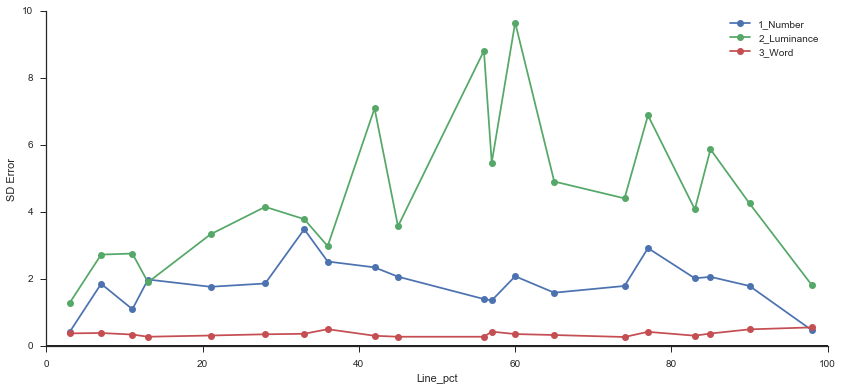

In [49]:
plt.figure(figsize=(14,6))
for key,grp in sd_df.groupby('conditionno'):
    print 
    plt.plot(grp.CorrectResponse.unique(),grp.groupby('CorrectResponse')['error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
#plt.ylim([0,0.04])
plt.xlabel('Line_pct')
plt.ylabel('SD Error')
sns.despine(trim=True)

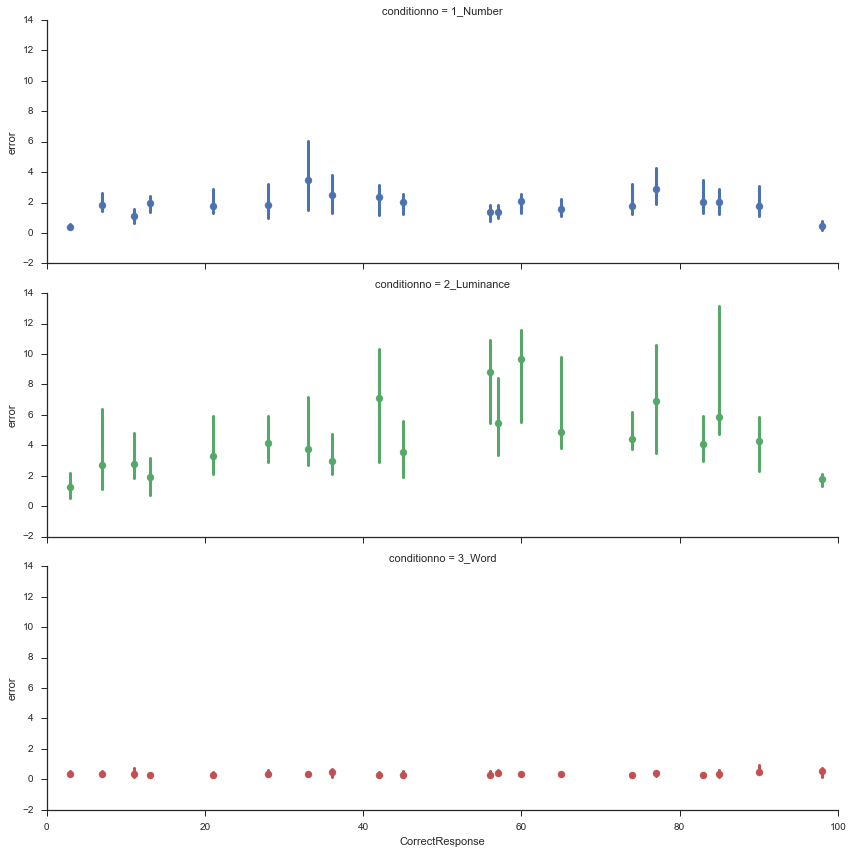

In [50]:
g = sns.FacetGrid(sd_df, row='conditionno',hue='conditionno',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'CorrectResponse', 'error', fit_reg=False,x_estimator=np.median).set(xlim=(0,100))
sns.despine(trim=True)

## Landmark Vs. MAE

In [51]:
plt_df.loc[:,'dist0'] = plt_df.CorrectResponse

In [52]:
plt_df.loc[:,'dist50'] = abs(plt_df.dist0 - 50)

In [53]:
plt_df.loc[:,'dist100'] = abs(plt_df.dist0 - 100)

In [54]:
plt_df.loc[:,'distLand'] = plt_df[['dist0','dist50','dist100']].min(1)

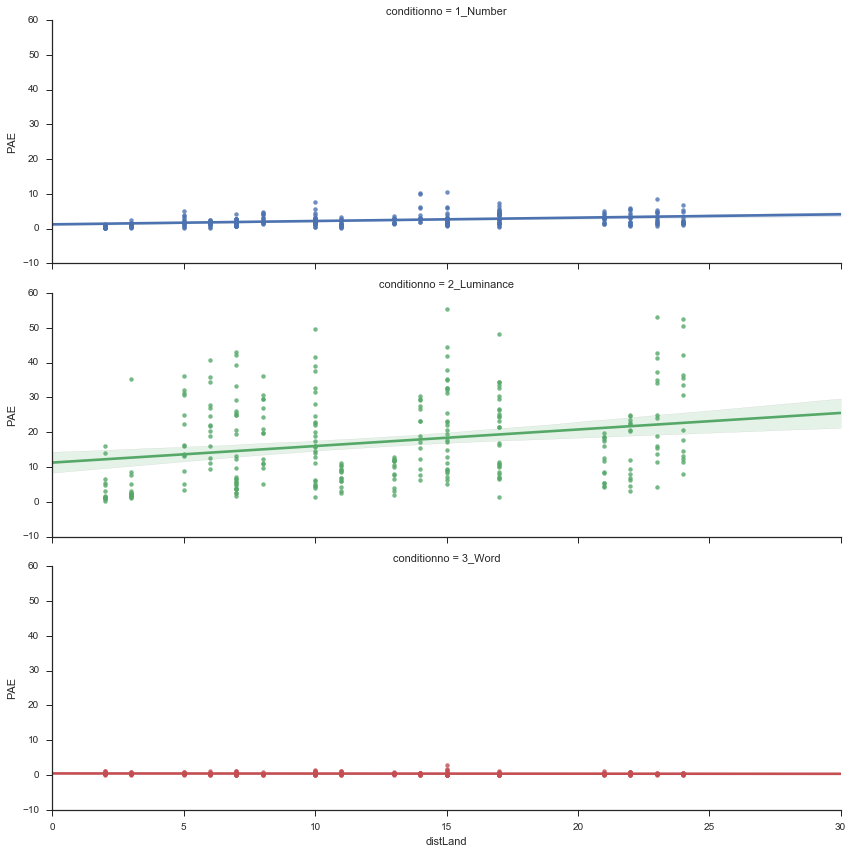

In [55]:
g = sns.lmplot(x='distLand',y='PAE',hue='conditionno',row='conditionno',data=plt_df,size=4,aspect=3)

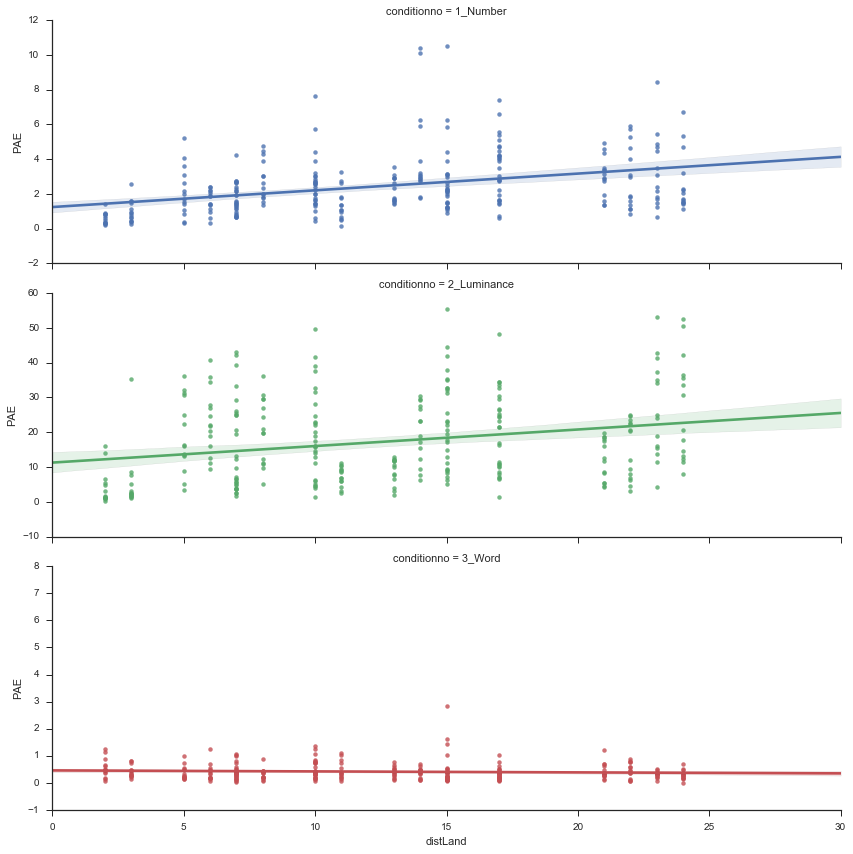

In [56]:
g = sns.lmplot(x='distLand',y='PAE',hue='conditionno',row='conditionno',data=plt_df,size=4,aspect=3,sharey=False)

## Landmark distance Vs signed error

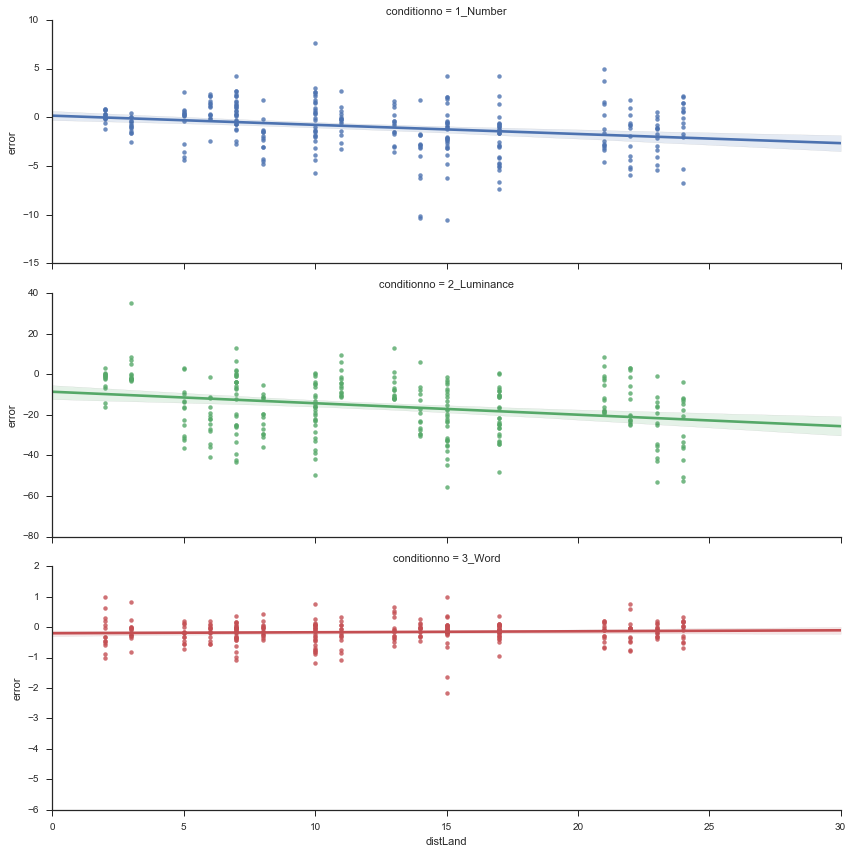

In [57]:
g = sns.lmplot(x='distLand',y='error',hue='conditionno',row='conditionno',data=plt_df,size=4,aspect=3,sharey=False)

# Median Estimated Position

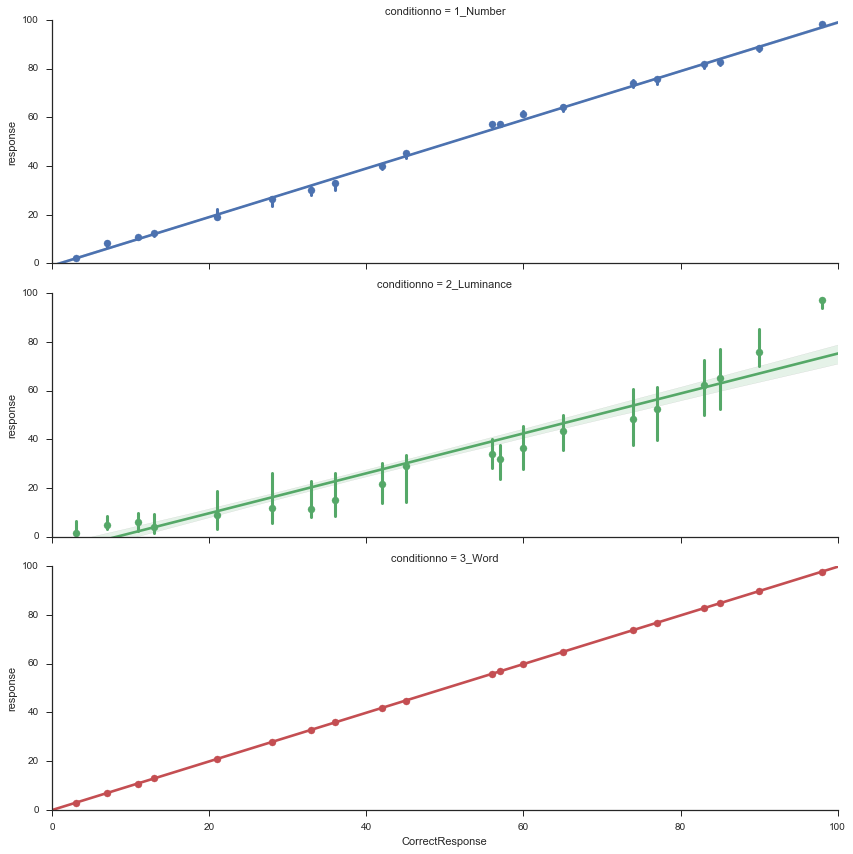

In [58]:
g = sns.lmplot(x='CorrectResponse',y='response',hue='conditionno',row='conditionno',data=plt_df,x_estimator=np.median,
               size=4,aspect=3).set(xlim=(0,100),ylim=(0,100))

In [59]:
from scipy.optimize import curve_fit
def exp_fit(x, a, b):
    return a + np.exp(b * x)

In [60]:
len(plt_df.loc[plt_df['conditionno'] == '1_Number','CorrectResponse'])

280

In [61]:
len(plt_df.loc[plt_df['conditionno'] == '1_Number','response'])

280

In [62]:
popt,pcov = curve_fit(exp_fit, plt_df.loc[plt_df['conditionno'] == '1_Number','CorrectResponse'],
                  plt_df.loc[plt_df['conditionno'] == '1_Number','response'])    

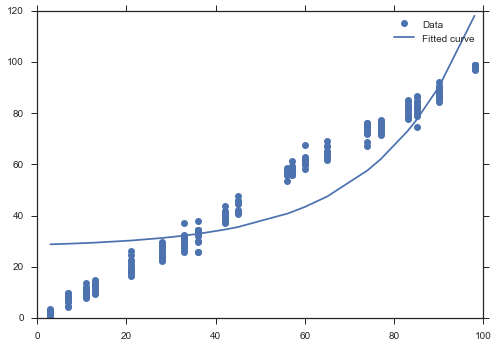

In [63]:
plt.plot(plt_df.loc[plt_df['conditionno'] == '1_Number','CorrectResponse'],
        plt_df.loc[plt_df['conditionno'] == '1_Number','response'], 'bo',label='Data')
plt.plot(plt_df.loc[plt_df['conditionno'] == '1_Number','CorrectResponse'],
        exp_fit(plt_df.loc[plt_df['conditionno'] == '1_Number','CorrectResponse'], *popt),
         'b-', label='Fitted curve')
plt.legend()

In [64]:
popt,pcov = curve_fit(exp_fit, plt_df.loc[plt_df['conditionno'] == '2_Luminance','CorrectResponse'],
                  plt_df.loc[plt_df['conditionno'] == '2_Luminance','response'])    

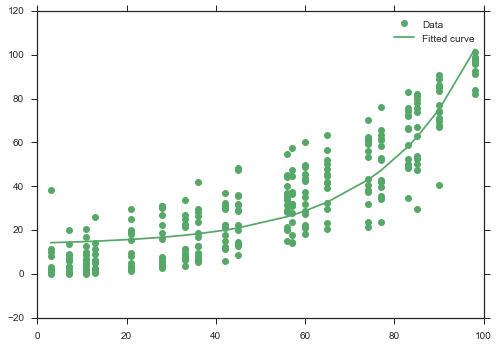

In [65]:
plt.plot(plt_df.loc[plt_df['conditionno'] == '2_Luminance','CorrectResponse'],
        plt_df.loc[plt_df['conditionno'] == '2_Luminance','response'], 'go',label='Data')
plt.plot(plt_df.loc[plt_df['conditionno'] == '2_Luminance','CorrectResponse'],
        exp_fit(plt_df.loc[plt_df['conditionno'] == '2_Luminance','CorrectResponse'], *popt),
         'g-', label='Fitted curve')
plt.legend()

In [66]:
print "a = %s , b = %s" % (popt[0], popt[1])

a = 13.1286371973 , b = 0.0458427189661


In [67]:
def resid(a,x,y):
    return y - exp_fit(x,a[0],a[1])

In [68]:
from scipy.optimize import leastsq

In [69]:
popt,pcov = curve_fit(exp_fit, plt_df.loc[plt_df['conditionno'] == '2_Luminance','CorrectResponse'],
                  plt_df.loc[plt_df['conditionno'] == '2_Luminance','response'])    

In [70]:
residuals = resid(popt,plt_df.loc[plt_df['conditionno'] == '2_Luminance','CorrectResponse'],
                  plt_df.loc[plt_df['conditionno'] == '2_Luminance','response'])

In [71]:
preds = exp_fit(plt_df.loc[plt_df['conditionno'] == '2_Luminance','CorrectResponse'], *popt)

In [72]:
x = plt_df.loc[plt_df['conditionno'] == '2_Luminance','CorrectResponse']
y = plt_df.loc[plt_df['conditionno'] == '2_Luminance','response']

In [73]:
p,cov,infodict,mesg,ier = leastsq(
        resid,popt,args=(x,y),full_output=True)

In [74]:
ssErr = (infodict['fvec']**2).sum()

In [75]:
ssTot = ((y-y.mean())**2).sum()
rsquared = 1-(ssErr/ssTot )

In [76]:
rsquared

0.7914973794700112